# III. Convolutional Neural Network 

## IIII.1 - Import Libraries and Data

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical, plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten
from keras.optimizers import Adam, SGD, RMSprop, Adagrad, Adadelta, Adamax, Nadam
from sklearn.metrics import classification_report 
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
import pprint as pp

In [45]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [46]:
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)


x_train shape: (60000, 28, 28) y_train shape: (60000,)


You can find class names and other details in https://keras.io/api/datasets/fashion_mnist/

## III.2 Cleaning Data: 

In [47]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat","Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

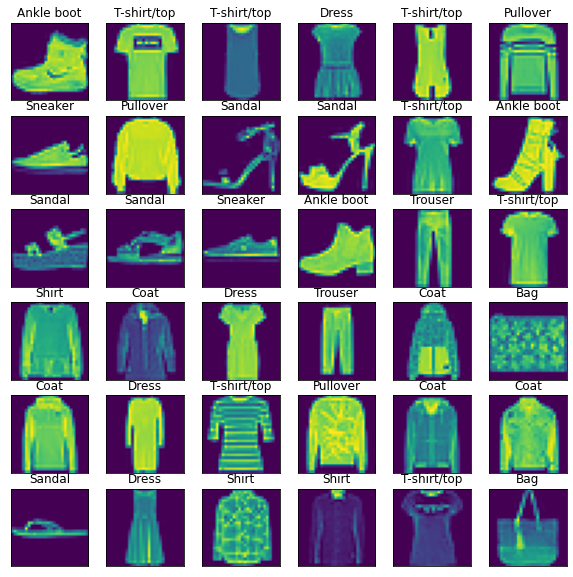

In [48]:
plt.figure(figsize=(10, 10))
for i in range(36):
    plt.subplot(6, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i].reshape((28,28)))
    label_index = int(y_train[i])
    plt.title(class_names[label_index])
plt.show()

In [49]:
img_rows = 28
img_cols = 28
batch_size = 512
img_shape = (img_rows,img_cols,1)

In [50]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [51]:
x_train = x_train.astype('float32') / 255
x_val = x_val.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [52]:
y_train = to_categorical(y_train, num_classes=10)
y_val = to_categorical(y_val, num_classes=10)
# y_test = to_categorical(y_test, num_classes=10)

## III.3. First model: 

In [53]:
model1 = Sequential([
    Conv2D(filters=32,kernel_size=3,activation='relu',padding='same' ,input_shape = img_shape),   
    # image_shape = (28,28)  we use padding = 'same' to ensure that the output has the same spatial dimensions as the input 
    MaxPooling2D(pool_size=2) ,
    # Reduce the spatial dimensions of feature maps while retaining the most important information (28, 28) to (14, 14)
    Dropout(0.2), 
    # We are averaging the results over a set of network configurations. it's regularization technique to prevent overfitting, rate = 0.2 it's the fraction of the input units to drop.
    Flatten(), 
    # flatten out the layers 
    Dense(32,activation='relu'), 
    Dense(10,activation = 'softmax')  
])

In [54]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 flatten_2 (Flatten)         (None, 6272)              0         
                                                                 
 dense_4 (Dense)             (None, 32)                200736    
                                                                 
 dense_5 (Dense)             (None, 10)                330       
                                                      

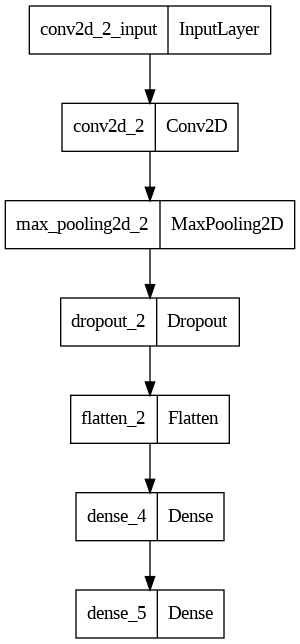

In [55]:
plot_model(model1, to_file='model.png')

In [56]:
model1.compile(loss ='categorical_crossentropy', optimizer=Adam(learning_rate=1e-3) ,metrics =['accuracy'])

In [57]:
NO_EPOCHS = 10
BATCH_SIZE = 512
history1 = model1.fit(x_train, y_train,
                  batch_size=BATCH_SIZE,
                  epochs=NO_EPOCHS,
                  verbose=1,
                  validation_data=(x_val, y_val))

Epoch 1/10
94/94 [==============================] - 2s 12ms/step - loss: 0.7567 - accuracy: 0.7564 - val_loss: 0.4782 - val_accuracy: 0.8328
Epoch 2/10
94/94 [==============================] - 1s 10ms/step - loss: 0.4391 - accuracy: 0.8476 - val_loss: 0.4029 - val_accuracy: 0.8602
Epoch 3/10
94/94 [==============================] - 1s 10ms/step - loss: 0.3873 - accuracy: 0.8653 - val_loss: 0.3723 - val_accuracy: 0.8683
Epoch 4/10
94/94 [==============================] - 1s 11ms/step - loss: 0.3650 - accuracy: 0.8727 - val_loss: 0.3542 - val_accuracy: 0.8770
Epoch 5/10
94/94 [==============================] - 1s 10ms/step - loss: 0.3428 - accuracy: 0.8797 - val_loss: 0.3313 - val_accuracy: 0.8838
Epoch 6/10
94/94 [==============================] - 1s 10ms/step - loss: 0.3263 - accuracy: 0.8853 - val_loss: 0.3222 - val_accuracy: 0.8873
Epoch 7/10
94/94 [==============================] - 1s 9ms/step - loss: 0.3133 - accuracy: 0.8888 - val_loss: 0.3249 - val_accuracy: 0.8850
Epoch 8/10
94/

Text(0.5, 1.0, 'Train - Accuracy')

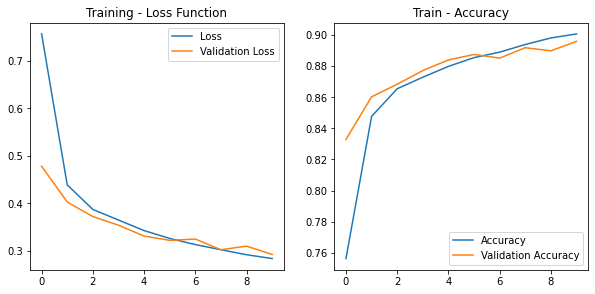

In [58]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(history1.history['loss'], label='Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history1.history['accuracy'], label='Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

In [60]:
# test_loss, test_acc = model1.evaluate(x_test, y_test, verbose=0)
# print('Test accuracy:', test_acc)

# x_test = x_test.reshape((x_test.shape[0], 784,))
y_pred = model1.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [61]:
y_pred_labels = np.argmax(y_pred, axis=1)

In [64]:
print(classification_report(y_test, y_pred_labels))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1000
           1       0.99      0.96      0.98      1000
           2       0.84      0.82      0.83      1000
           3       0.86      0.92      0.89      1000
           4       0.83      0.82      0.83      1000
           5       0.98      0.96      0.97      1000
           6       0.70      0.68      0.69      1000
           7       0.93      0.95      0.94      1000
           8       0.97      0.97      0.97      1000
           9       0.95      0.96      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



## III.4 Second model 

In [65]:
model2 = tf.keras.Sequential()
# Must define the input shape in the first layer of the neural network
model2.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model2.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model2.add(tf.keras.layers.Dropout(0.3))
model2.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model2.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model2.add(tf.keras.layers.Dropout(0.3))
model2.add(tf.keras.layers.Flatten())
model2.add(tf.keras.layers.Dense(256, activation='relu'))
model2.add(tf.keras.layers.Dropout(0.5))
model2.add(tf.keras.layers.Dense(10, activation='softmax'))
# Take a look at the model summary
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 64)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 32)        8224      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 7, 7, 32)         

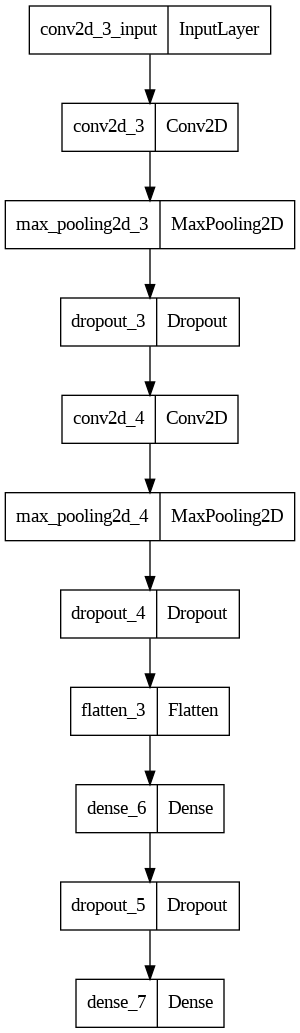

In [66]:
plot_model(model2, to_file='model.png')

In [67]:
model2.compile(loss ='categorical_crossentropy', optimizer=Adam(learning_rate=1e-3) ,metrics =['accuracy'])

In [68]:
NO_EPOCHS = 20
BATCH_SIZE = 512
history2 = model2.fit(x_train, y_train,
                  batch_size=BATCH_SIZE,
                  epochs=NO_EPOCHS,
                  verbose=1,
                  validation_data=(x_val, y_val))

Epoch 1/20
94/94 [==============================] - 3s 23ms/step - loss: 0.9386 - accuracy: 0.6505 - val_loss: 0.5402 - val_accuracy: 0.8023
Epoch 2/20
94/94 [==============================] - 2s 21ms/step - loss: 0.5378 - accuracy: 0.8024 - val_loss: 0.4178 - val_accuracy: 0.8523
Epoch 3/20
94/94 [==============================] - 2s 22ms/step - loss: 0.4675 - accuracy: 0.8304 - val_loss: 0.3863 - val_accuracy: 0.8639
Epoch 4/20
94/94 [==============================] - 2s 21ms/step - loss: 0.4284 - accuracy: 0.8447 - val_loss: 0.3513 - val_accuracy: 0.8730
Epoch 5/20
94/94 [==============================] - 2s 20ms/step - loss: 0.4005 - accuracy: 0.8545 - val_loss: 0.3309 - val_accuracy: 0.8805
Epoch 6/20
94/94 [==============================] - 2s 20ms/step - loss: 0.3794 - accuracy: 0.8624 - val_loss: 0.3134 - val_accuracy: 0.8853
Epoch 7/20
94/94 [==============================] - 2s 20ms/step - loss: 0.3645 - accuracy: 0.8661 - val_loss: 0.3060 - val_accuracy: 0.8868
Epoch 8/20
94

Text(0.5, 1.0, 'Train - Accuracy')

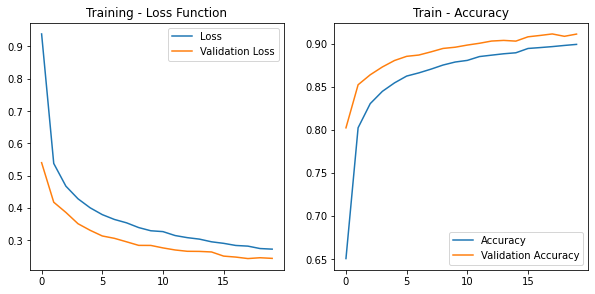

In [69]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(history2.history['loss'], label='Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history2.history['accuracy'], label='Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

In [71]:
y_pred = model2.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [72]:
y_pred_labels = np.argmax(y_pred, axis=1)

In [73]:
print(classification_report(y_test, y_pred_labels))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1000
           1       0.99      0.98      0.98      1000
           2       0.84      0.88      0.86      1000
           3       0.91      0.90      0.91      1000
           4       0.84      0.84      0.84      1000
           5       0.99      0.97      0.98      1000
           6       0.76      0.69      0.72      1000
           7       0.94      0.98      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.97      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [75]:
def build_model(optimizer, learning_rate, activation, rate, initializer, num_unit, pool_size):
  model = tf.keras.Sequential()
  # Must define the input shape in the first layer of the neural network
  model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation=activation, input_shape=(28,28,1))) 
  model.add(tf.keras.layers.MaxPooling2D(pool_size = pool_size))
  model.add(tf.keras.layers.Dropout(rate))
  model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation = activation))
  model.add(tf.keras.layers.MaxPooling2D(pool_size = pool_size))
  model.add(tf.keras.layers.Dropout(rate))
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(num_unit, kernel_initializer = initializer,  activation = activation))
  model.add(tf.keras.layers.Dropout(rate))
  model.add(tf.keras.layers.Dense(10, activation='softmax'))
  model.compile(loss='categorical_crossentropy',
                  optimizer=optimizer(lr=learning_rate),
                  metrics=['accuracy'])
  return model

In [76]:
optimizer = [SGD, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam][:1]

learning_rate = [0.1, 0.001, 0.02][:1]

activation = ['relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear'][:1]

num_unit = [10, 5][:1]

initializer = ['lecun_uniform', 'normal', 'he_normal', 'he_uniform'][:1]

rate = [0.3, 0.2, 0.8][:1]

pool_size = [2, 4][:1]

batch_size = [20, 50, 100][:1]

epochs = [10, 20, 30][:1]

In [77]:
parameters = dict(batch_size = batch_size,
                  epochs = epochs,
                  rate = rate,
                  num_unit = num_unit,
                  initializer = initializer,
                  learning_rate = learning_rate,
                  activation = activation,
                  pool_size = pool_size,
                  optimizer = optimizer
                  )

model = KerasClassifier(build_fn=build_model, verbose=0)

models = GridSearchCV(estimator = model, param_grid=parameters, n_jobs=1)

<ipython-input-77-4d760cfc46f8>:12: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=build_model, verbose=0)


In [78]:
best_model = models.fit(x_train, y_train)
print('Best model :')
pp.pprint(best_model.best_params_)

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__ini

Best model :
{'activation': 'relu',
 'batch_size': 20,
 'epochs': 10,
 'initializer': 'lecun_uniform',
 'learning_rate': 0.1,
 'num_unit': 10,
 'optimizer': <class 'keras.optimizers.optimizer_v2.gradient_descent.SGD'>,
 'pool_size': 2,
 'rate': 0.3}


In [80]:
model3 = tf.keras.Sequential()
# Must define the input shape in the first layer of the neural network
model3.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model3.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model3.add(tf.keras.layers.Dropout(0.3))
model3.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model3.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model3.add(tf.keras.layers.Dropout(0.3))
model3.add(tf.keras.layers.Flatten())
model3.add(tf.keras.layers.Dense(256, kernel_initializer = 'lecun_uniform', activation='relu'))
model3.add(tf.keras.layers.Dropout(0.3))
model3.add(tf.keras.layers.Dense(10, activation='softmax'))
# Take a look at the model summary
model3.summary()
model3.compile(loss='categorical_crossentropy',
                   optimizer=SGD(lr=0.1),
                   metrics=['accuracy'])

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 28, 28, 64)        320       
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 dropout_27 (Dropout)        (None, 14, 14, 64)        0         
                                                                 
 conv2d_20 (Conv2D)          (None, 14, 14, 32)        8224      
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 7, 7, 32)         0         
 g2D)                                                            
                                                                 
 dropout_28 (Dropout)        (None, 7, 7, 32)        

In [82]:
NO_EPOCHS = 20
BATCH_SIZE = 20
history3 = model3.fit(x_train, y_train,
                  batch_size=BATCH_SIZE,
                  epochs=NO_EPOCHS,
                  verbose=1,
                  validation_data=(x_val, y_val))

Epoch 1/20
2400/2400 [==============================] - 13s 5ms/step - loss: 0.4726 - accuracy: 0.8246 - val_loss: 0.3598 - val_accuracy: 0.8690
Epoch 2/20
2400/2400 [==============================] - 12s 5ms/step - loss: 0.4036 - accuracy: 0.8503 - val_loss: 0.3419 - val_accuracy: 0.8731
Epoch 3/20
2400/2400 [==============================] - 12s 5ms/step - loss: 0.3723 - accuracy: 0.8617 - val_loss: 0.3079 - val_accuracy: 0.8859
Epoch 4/20
2400/2400 [==============================] - 12s 5ms/step - loss: 0.3493 - accuracy: 0.8701 - val_loss: 0.2968 - val_accuracy: 0.8877
Epoch 5/20
2400/2400 [==============================] - 12s 5ms/step - loss: 0.3359 - accuracy: 0.8754 - val_loss: 0.2847 - val_accuracy: 0.8931
Epoch 6/20
2400/2400 [==============================] - 12s 5ms/step - loss: 0.3195 - accuracy: 0.8806 - val_loss: 0.2739 - val_accuracy: 0.8987
Epoch 7/20
2400/2400 [==============================] - 12s 5ms/step - loss: 0.3163 - accuracy: 0.8800 - val_loss: 0.2958 - val_ac

Text(0.5, 1.0, 'Train - Accuracy')

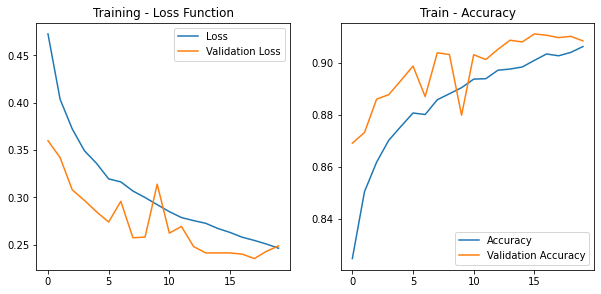

In [83]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(history3.history['loss'], label='Loss')
plt.plot(history3.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history3.history['accuracy'], label='Accuracy')
plt.plot(history3.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

In [84]:
y_pred = model1.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [85]:
y_pred_labels = np.argmax(y_pred, axis=1)

In [86]:
print(classification_report(y_test, y_pred_labels))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1000
           1       0.99      0.96      0.98      1000
           2       0.84      0.82      0.83      1000
           3       0.86      0.92      0.89      1000
           4       0.83      0.82      0.83      1000
           5       0.98      0.96      0.97      1000
           6       0.70      0.68      0.69      1000
           7       0.93      0.95      0.94      1000
           8       0.97      0.97      0.97      1000
           9       0.95      0.96      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



## III.4 Transfert learning with RESNET50

In [5]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [7]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [8]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [9]:
# x_train = x_train.astype('float32')
# x_test = x_test.astype('float32')
# reshape data to be used with ResNet50
x_train = x_train.reshape((x_train.shape[0], 28, 28))
x_test = x_test.reshape((x_test.shape[0], 28, 28))
x_val = x_val.reshape((x_val.shape[0], 28, 28))


# Convert data to 3 channels 
x_train = np.stack((x_train,)*3, axis=-1)
x_test = np.stack((x_test,)*3, axis=-1)
x_val = np.stack((x_val,)*3, axis=-1)



In [10]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)

In [11]:
model4 = tf.keras.Sequential()
#add the pretrained model 
model4.add(ResNet50(include_top = False, pooling = 'avg', weights = 'imagenet'))
#add full connected layers 
model4.add(Dense(512, activation = 'relu'))
model4.add(Dense(10, activation = 'softmax'))
# set resnet to no trainable 
model4.layers[0].trainable = False
model4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 24,641,930
Trainable params: 1,054,218
Non-trainable params: 23,587,712
_________________________________________________________________


In [12]:
model4.compile(optimizer ='Adam', loss = 'categorical_crossentropy', metrics =['accuracy'])

In [13]:
history4 = model4.fit(x_train, y_train,
                  batch_size=512,
                  epochs=20,
                  verbose=1,
                  validation_data=(x_val, y_val))

Epoch 1/20
94/94 [==============================] - 18s 103ms/step - loss: 0.8018 - accuracy: 0.7762 - val_loss: 0.4679 - val_accuracy: 0.8303
Epoch 2/20
94/94 [==============================] - 5s 54ms/step - loss: 0.4059 - accuracy: 0.8508 - val_loss: 0.4579 - val_accuracy: 0.8402
Epoch 3/20
94/94 [==============================] - 5s 55ms/step - loss: 0.3479 - accuracy: 0.8711 - val_loss: 0.4250 - val_accuracy: 0.8468
Epoch 4/20
94/94 [==============================] - 5s 54ms/step - loss: 0.3112 - accuracy: 0.8846 - val_loss: 0.4158 - val_accuracy: 0.8459
Epoch 5/20
94/94 [==============================] - 5s 58ms/step - loss: 0.2838 - accuracy: 0.8950 - val_loss: 0.3991 - val_accuracy: 0.8584
Epoch 6/20
94/94 [==============================] - 5s 58ms/step - loss: 0.2597 - accuracy: 0.9037 - val_loss: 0.4398 - val_accuracy: 0.8460
Epoch 7/20
94/94 [==============================] - 5s 58ms/step - loss: 0.2417 - accuracy: 0.9094 - val_loss: 0.4145 - val_accuracy: 0.8558
Epoch 8/20


Text(0.5, 1.0, 'Train - Accuracy')

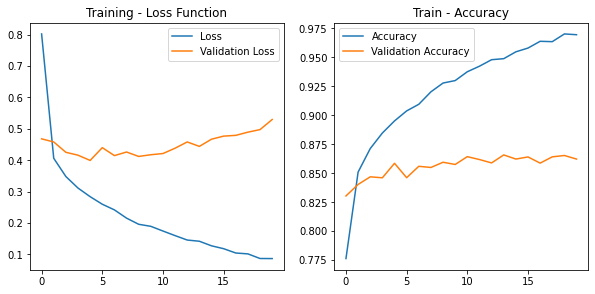

In [14]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(history4.history['loss'], label='Loss')
plt.plot(history4.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history4.history['accuracy'], label='Accuracy')
plt.plot(history4.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

In [15]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [16]:
x_train = x_train.reshape((x_train.shape[0], 28, 28))
x_test = x_test.reshape((x_test.shape[0], 28, 28))
x_train = np.stack((x_train,)*3, axis=-1)
x_test = np.stack((x_test,)*3, axis=-1)

In [19]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [21]:
train_generator = ImageDataGenerator(
    rescale = 1./255,  # normalization of images
    rotation_range = 40, # augmention of images to avoid overfitting
    shear_range = 0.2,
    zoom_range = 0.2,
    fill_mode = 'nearest')
val_generator = ImageDataGenerator(rescale = 1./255)

train_iterator = train_generator.flow(x_train, y_train, batch_size=512, shuffle=True)

val_iterator = val_generator.flow(x_test, y_test, batch_size=512, shuffle=False)

In [22]:
history5 = model4.fit(train_iterator,
                  epochs=20,
                  verbose=1,
                  validation_data=val_iterator)

Epoch 1/20
118/118 [==============================] - 34s 274ms/step - loss: 1.9325 - accuracy: 0.3927 - val_loss: 1.1719 - val_accuracy: 0.6060
Epoch 2/20
118/118 [==============================] - 31s 258ms/step - loss: 1.2364 - accuracy: 0.5666 - val_loss: 1.0059 - val_accuracy: 0.6250
Epoch 3/20
118/118 [==============================] - 29s 246ms/step - loss: 1.1022 - accuracy: 0.6036 - val_loss: 0.9494 - val_accuracy: 0.6467
Epoch 4/20
118/118 [==============================] - 30s 254ms/step - loss: 1.0305 - accuracy: 0.6292 - val_loss: 0.8994 - val_accuracy: 0.6598
Epoch 5/20
118/118 [==============================] - 29s 247ms/step - loss: 0.9910 - accuracy: 0.6410 - val_loss: 0.8875 - val_accuracy: 0.6696
Epoch 6/20
118/118 [==============================] - 30s 253ms/step - loss: 0.9567 - accuracy: 0.6529 - val_loss: 0.8526 - val_accuracy: 0.6778
Epoch 7/20
118/118 [==============================] - 31s 259ms/step - loss: 0.9275 - accuracy: 0.6626 - val_loss: 0.8351 - val_ac

Text(0.5, 1.0, 'Train - Accuracy')

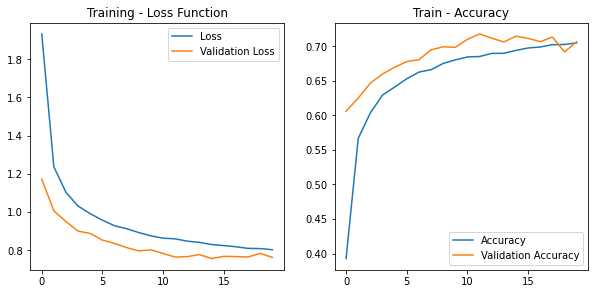

In [23]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(history5.history['loss'], label='Loss')
plt.plot(history5.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history5.history['accuracy'], label='Accuracy')
plt.plot(history5.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')